# Project Structure and Overview
* The project aims to predict employee performance using the [INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 dataset](http://data.iabac.org/exam/p2/data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls). The key steps in the project are as follows:

1. Data Loading and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Feature Selection and Engineering
4. Model Training and Evaluation
5. Results and Insights

* The Project Structure
``` bash
├── Project Summary
│   ├── Requirement
│   ├── Analysis
│   └── Summary
├── data
│   ├── external
│   ├── processed
│   └── raw
├── src
│   ├── Data Processing
│   │   ├── data_processing.ipynb
│   │   └── data_exploratory_analysis.ipynb
│   ├── models
│   │   ├── train_model.ipynb
│   │   └── predict_model.ipynb
│   └── visualization
│       └── visualize.ipynb
└── references


```



# 1. Project Ideation

**Problem Statement**:

_To develop a predictive model that evaluates employee performance based on various factors such as demographic details, job role, satisfaction levels, and work-life balance. This model will help in identifying key attributes influencing performance, aiding in hiring and retention strategies._

* Objectives:

1) Analyze and preprocess the dataset to make it suitable for modeling.
2) Perform Exploratory Data Analysis (EDA) to understand the data and its distributions.
3) Select and engineer features that are most predictive of employee performance.
4) Train and evaluate multiple machine learning models.
5) Select the best model based on performance metrics and accuracy.
6) Deploy the model to predict employee performance.

# 2. Data Loading and Preprocessing

* File: `data_exploratory_analysis.ipynb`
    * This step involves loading the dataset, handling missing values, encoding categorical variables, and standardizing numerical features.
    * Preprocessing is critical for ensuring that the data is in a format suitable for machine learning algorithms, which often require numerical inputs.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

- Libraries:
    * `pandas`: A library used for data manipulation and analysis. It provides data structures like DataFrame for handling data efficiently.
    * `numpy`: A library used for numerical operations on large, multi-dimensional arrays and matrices.
    * `matplotlib.pyplot`: A library used for creating static, interactive, and animated visualizations in Python.
    * `seaborn`: A data visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
    * `sklearn.model_selection.train_test_split`: A function used to split the dataset into training and testing sets.
    * `sklearn.preprocessing.StandardScaler`: A class used to standardize features by removing the mean and scaling to unit variance.
    * `sklearn.preprocessing.LabelEncoder`: A class used to encode target labels with a value between 0 and n_classes-1.
    * `sklearn.decomposition.PCA`: A class used for dimensionality reduction through Principal Component Analysis.

In [2]:
# Load the dataset
data = pd.read_excel('data/raw/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

* _pd.read_excel_: This function reads the Excel file located at the specified path and loads it into a pandas DataFrame called `data`.

In [3]:
# Display the first few rows
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


* _data.head()_: This method is used to display the first five rows of the DataFrame, giving a quick look at the data structure and contents.

In [4]:
# Check for missing values
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

* _data.isnull().sum()_: This line checks for missing values in each column of the DataFrame and prints the total count of missing values per column.

In [5]:
# Statistical summary of numerical variables
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


* _data.describe()_: This method generates descriptive statistics of the DataFrame, summarizing the `central tendency`, `dispersion`, and `shape` of the dataset’s distribution, **excluding NaN values**. 
* It includes metrics like `mean`, `standard deviation`, `minimum` and `maximum values`, and `quartiles`.

In [6]:
# Statistical summary of categorical variables
data.describe(include=['object'])

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


* _data.describe(include=['object'])_: This version of the describe() method provides a summary of the categorical `(object-type) variables`, including the `count`, `number of unique values`, the `most frequent value` (top), and `its frequency` (freq).

In [7]:
# Save processed data
data.to_csv('data/processed/processed_data.csv', index=False)

* _data.to_csv_: This method saves the DataFrame to a CSV file at the specified path.
* The `index=False` parameter ensures that the row index is not included in the output file.

In brief the Data Loading and Preprocessing step conducted here involves:
* **Data Loading and Overview**: The code first loads the data from an Excel file and gives a preliminary view of the dataset, which helps in understanding the structure and potential issues.
* **Missing Values**: Checking for missing values is crucial for data cleaning and preprocessing.
* **Statistical Summaries**: Descriptive statistics provide insights into the distribution and summary of both numerical and categorical data.
* **Data Export**: Saving the processed data facilitates easy access and reuse of the cleaned dataset for future analysis or modeling.

# 3. Exploratory Data Analysis (EDA)

* File: `data_exploratory_analysis.ipynb`
    * EDA helps in understanding the relationships and distributions within the data. 
    * The correlation matrix identifies potential multicollinearity, while the distribution plot shows the balance of the target variable.

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
# Load Data
data = pd.read_csv('data/processed/processed_data.csv')

In [10]:
# Show the data types in the DataFrame
data.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

* `data.dtypes` is used to display the data types of each column in the pandas DataFrame data. 
* It provides information about the type of data stored in each column, which helps in understanding how to handle each variable for analysis, modeling, or preprocessing.
* While its output is important, it is crucial to also look at metadata accompanying the dataset. In this case, metadata summarizes the data types as follows:
    1. `EmpNumber`: _object_, which is the employee ID. This is a string (or categorical identifier) and not a numerical value.
    2. `Age`: _int64_, as the employee’s age.
    3. `Gender`: _object_, as the Employee’s gender (e.g., Male, Female).
    4. `EducationBackground`: _object_, as the employee’s education background (e.g., Marketing, Life Sciences).
    5. `MaritalStatus`: _object_, as the employee’s marital status (e.g., Single, Married).
    6. `EmpDepartment`: _object_, as the department in which the employee works (e.g., Sales, Human Resources).
    7. `EmpJobRole`: _object_, as the job role of the employee (e.g., Sales Executive, Manager).
    8. `BusinessTravelFrequency`: _object_, as the frequency of business travel (e.g., Travel_Rarely, Travel_Frequently).
    9. `DistanceFromHome`:_ int64_, as the distance (in kilometers) from home to work.
    10. `EmpEducationLevel`: encoded as _int64_, the level of education as per the metadata.
    11. `EmpEnvironmentSatisfaction`: encoded as _int64_, the satisfaction with the work environment as per the metadata.
    12. `EmpHourlyRate`: _int64_, as the hourly wage rate of the employee.
    13. `EmpJobInvolvement`: encoded as _int64_, the level of job involvement as per the metadata.
    14. `EmpJobLevel`: _int64_, as the job level in the organization.
    15. `EmpJobSatisfaction`: encoded as _int64_, level of job satisfaction as per the metadata.
    16. `NumCompaniesWorked`: _int64_, as number of companies the employee has worked for.
    17. `OverTime`: _object_, whether the employee works overtime (e.g., Yes, No).
    18. `EmpLastSalaryHikePercent`: _int64_, as the percentage increase in the salary during the last hike.
    19. `EmpRelationshipSatisfaction`: encoded as _int64_, the satisfaction with work relationships as per the metadata.
    20. `TotalWorkExperienceInYears`: _int64_, as the total years of work experience.
    21. `TrainingTimesLastYear`: _int64_, as the number of training sessions attended in the last year.
    22. `EmpWorkLifeBalance`: encoded as _int64_, Work-life balance as per the metadata.
    23. `ExperienceYearsAtThisCompany`: _int64_, Number of years the employee has been with the current company.
    24. `ExperienceYearsInCurrentRole`: _int64_, Number of years the employee has been in the current role.
    25. `YearsSinceLastPromotion`: _int64_, Number of years since the last promotion.
    26. `YearsWithCurrManager`: _int64_, Number of years with the current manager.
    27. `Attrition`: _object_, Whether the employee has left the company (e.g., Yes, No).
    28. `PerformanceRating`: encoded as _int64_, Performance rating as per the metadata. 

In [11]:
# List Numerical variables
numerical_cols = ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 
                  'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

* Purpose: This list includes all columns in the DataFrame that are numeric and will be used for numerical analysis.

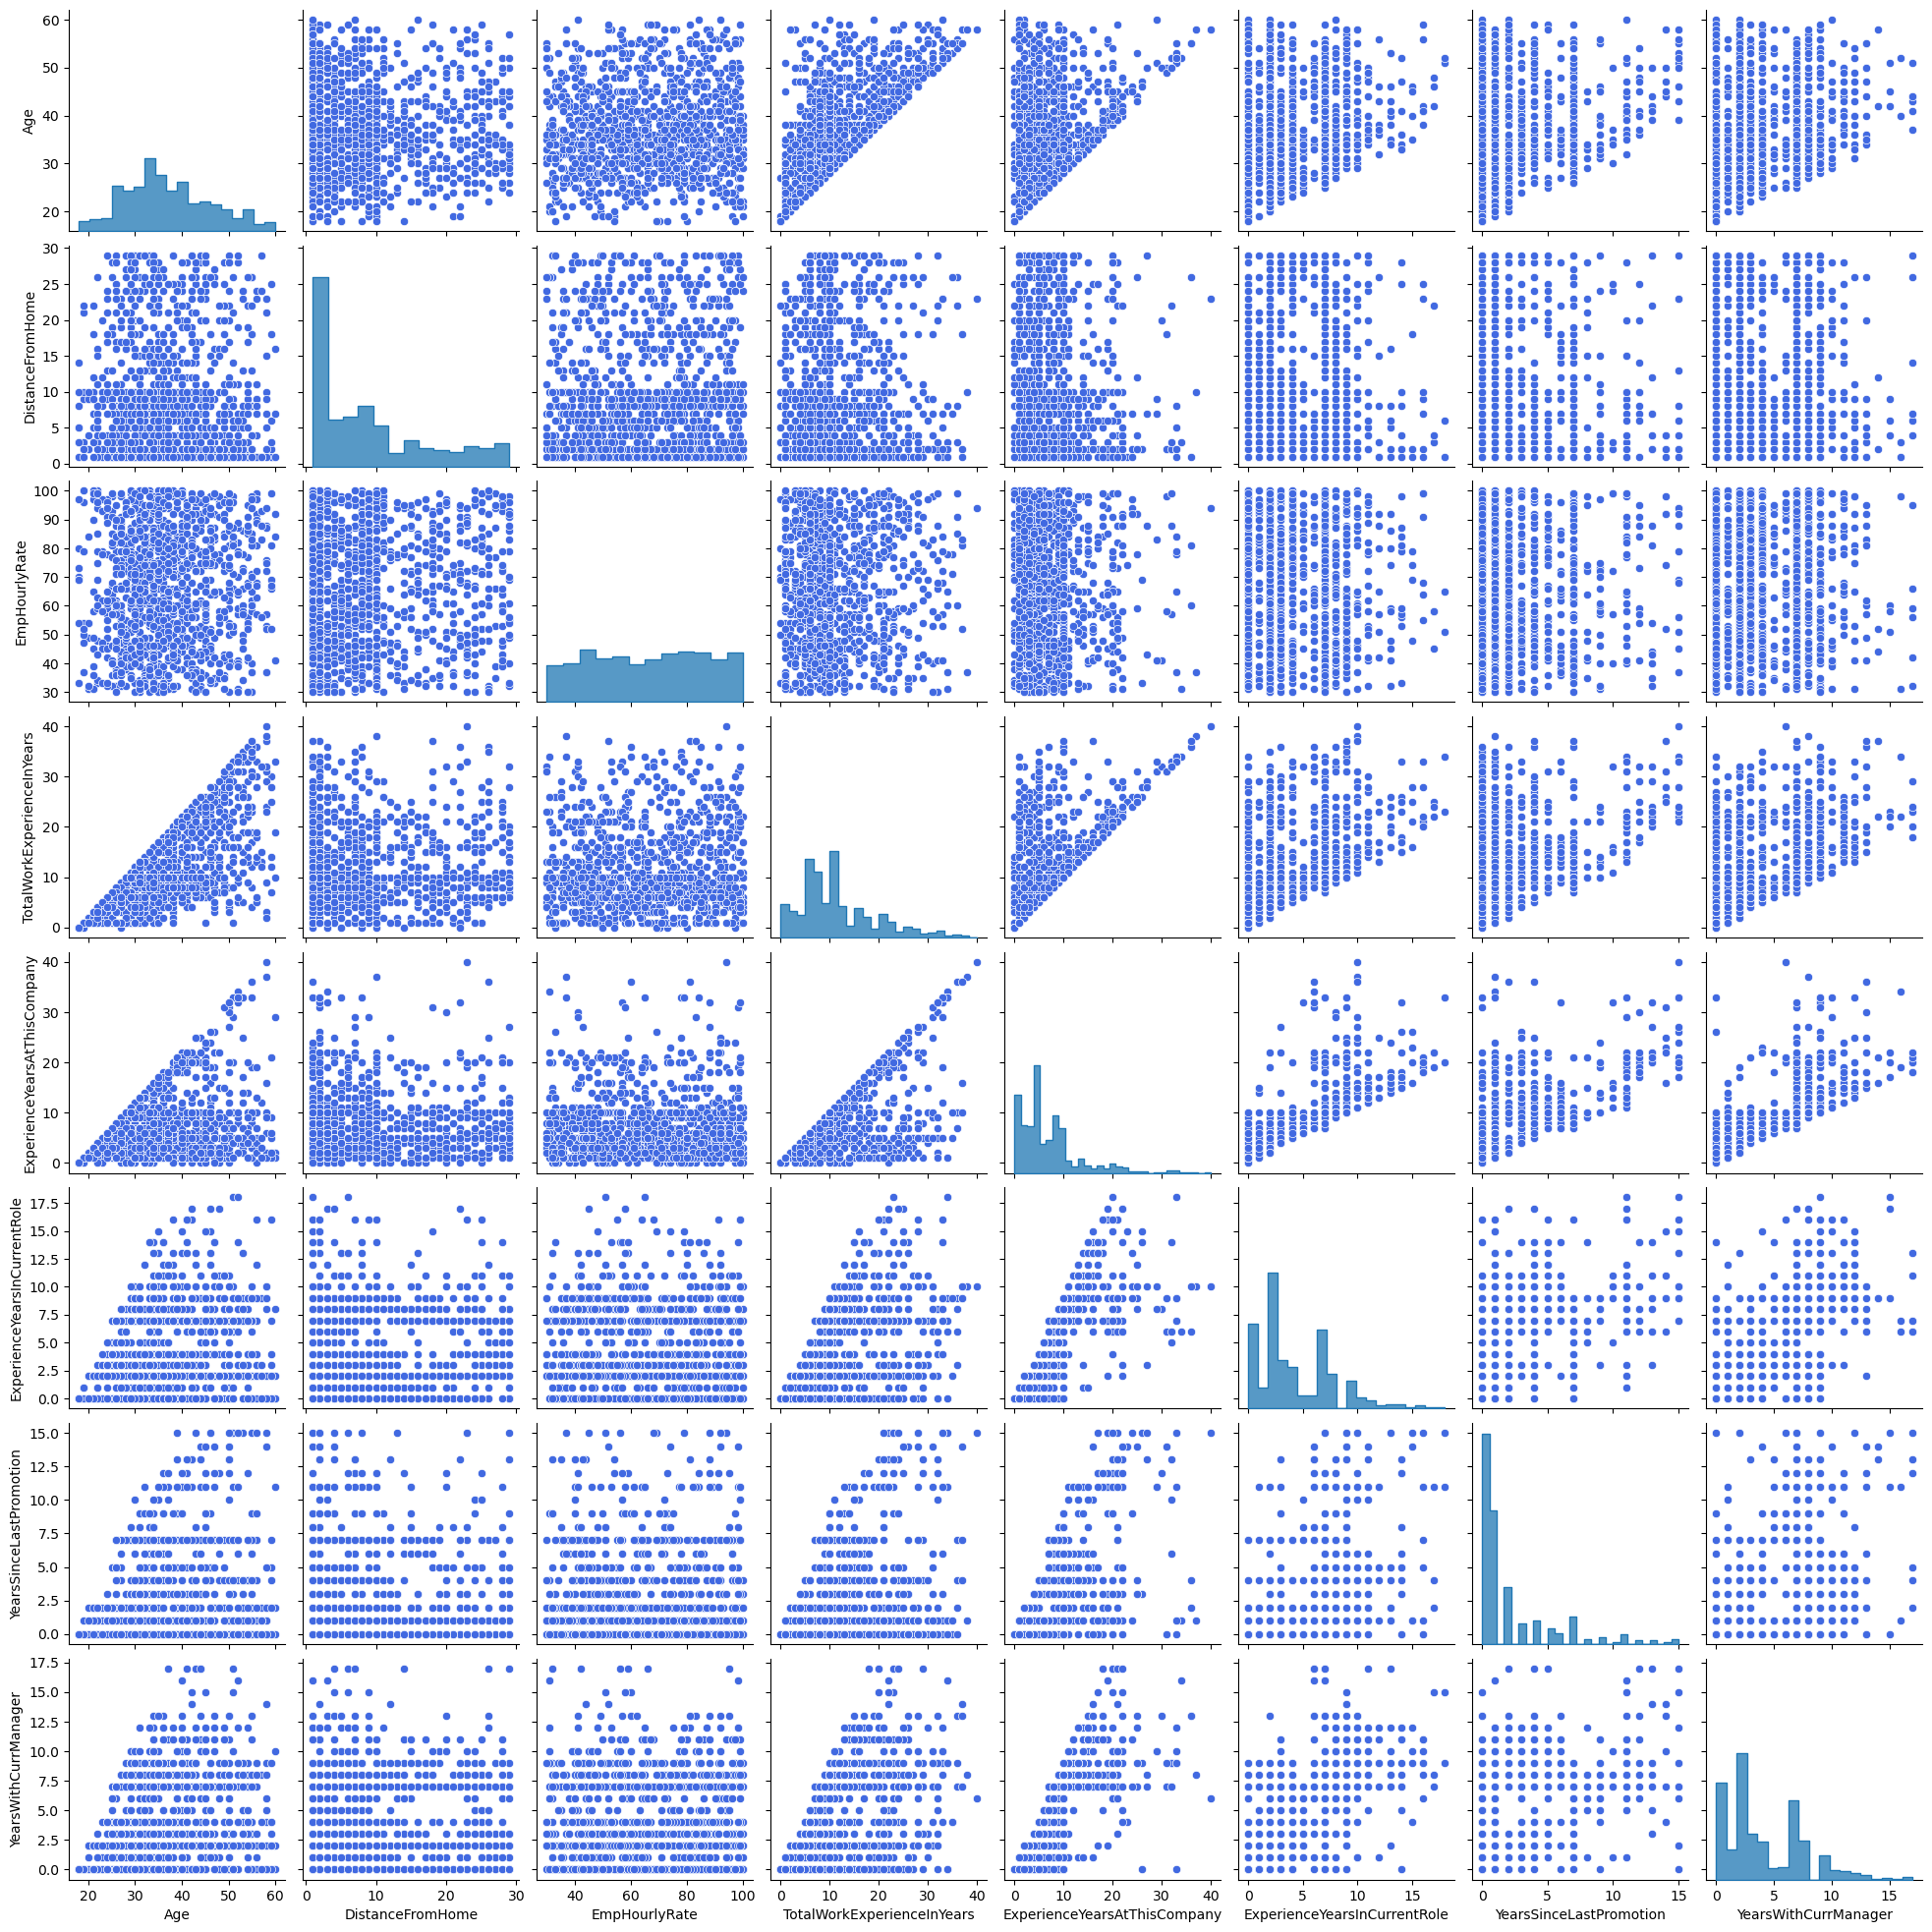

In [12]:
# Ensure the directory exists
save_dir = 'src/visualization'
os.makedirs(save_dir, exist_ok=True)

# Custom function to add both histograms and KDE on the diagonal
def hist_kde_diag(x, **kwargs):
    sns.histplot(x, kde=True, **kwargs)  # Plot both histogram and KDE

# Pairplot for numerical variables with custom diagonal function
sns.pairplot(data[numerical_cols], 
             diag_kind='hist',  # Use histograms on the diagonal
             diag_kws={'element': 'step'},  # Customize histogram appearance
             plot_kws={'color': 'royalblue'})  # Set color for pairplot markers

plt.show()  # Display the pairplot

* Purpose: Creates a pairplot (scatterplot matrix) of the numerical variables to visualize relationships between each pair of variables.
* Each scatterplot shows how one numerical variable relates to another. 
* The diagonal plots typically show the distribution of each individual variable.

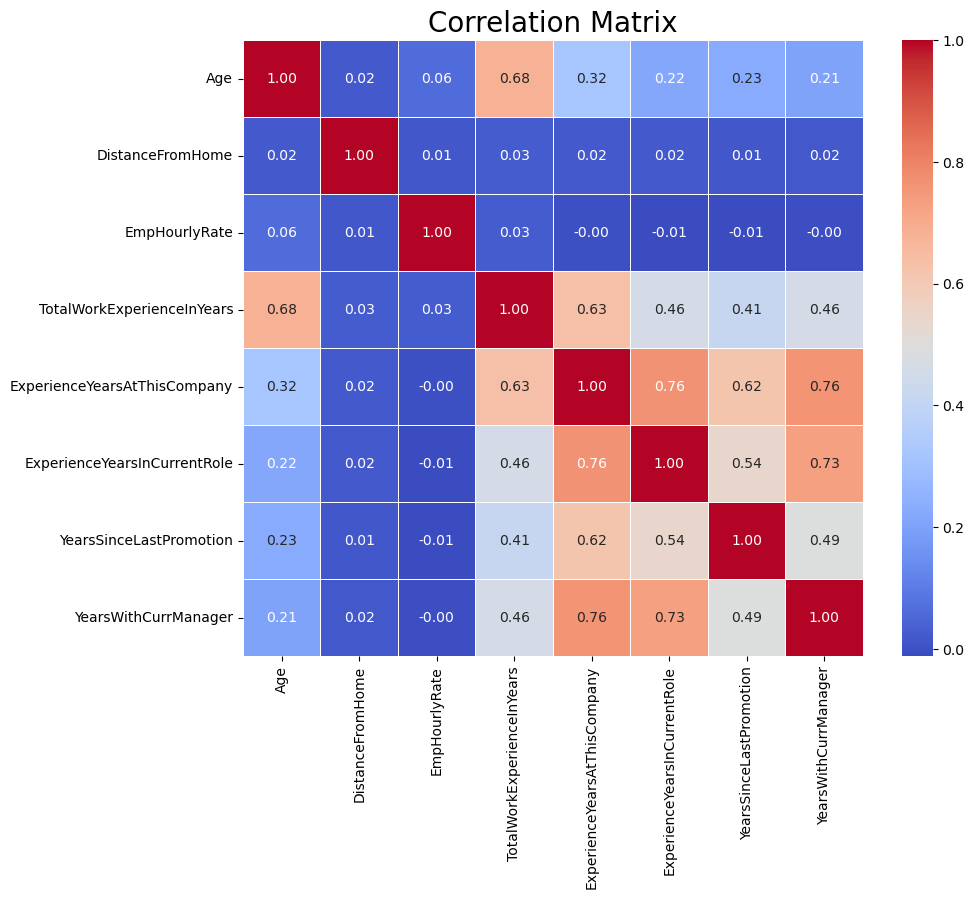

In [13]:
# Ensure the directory exists
save_dir = 'src/visualization'
os.makedirs(save_dir, exist_ok=True)

# Correlation Matrix
corr_matrix = data[numerical_cols].corr()  # Compute the correlation matrix
plt.figure(figsize=(10, 8))  # Define canvas size for the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # Plot heatmap
plt.title('Correlation Matrix', fontsize=20)  # Set plot title with font size
plt.show()  # Display the heatmap

* Purpose: Computes and visualizes the correlation matrix for numerical variables.
* How It Works:
    * `data[numerical_cols].corr()` calculates the correlation coefficients between numerical variables.
    * `sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')` creates a heatmap to display these correlations, with color intensity representing the strength of the correlation.
    * `annot=True` adds numerical values to each cell in the heatmap.

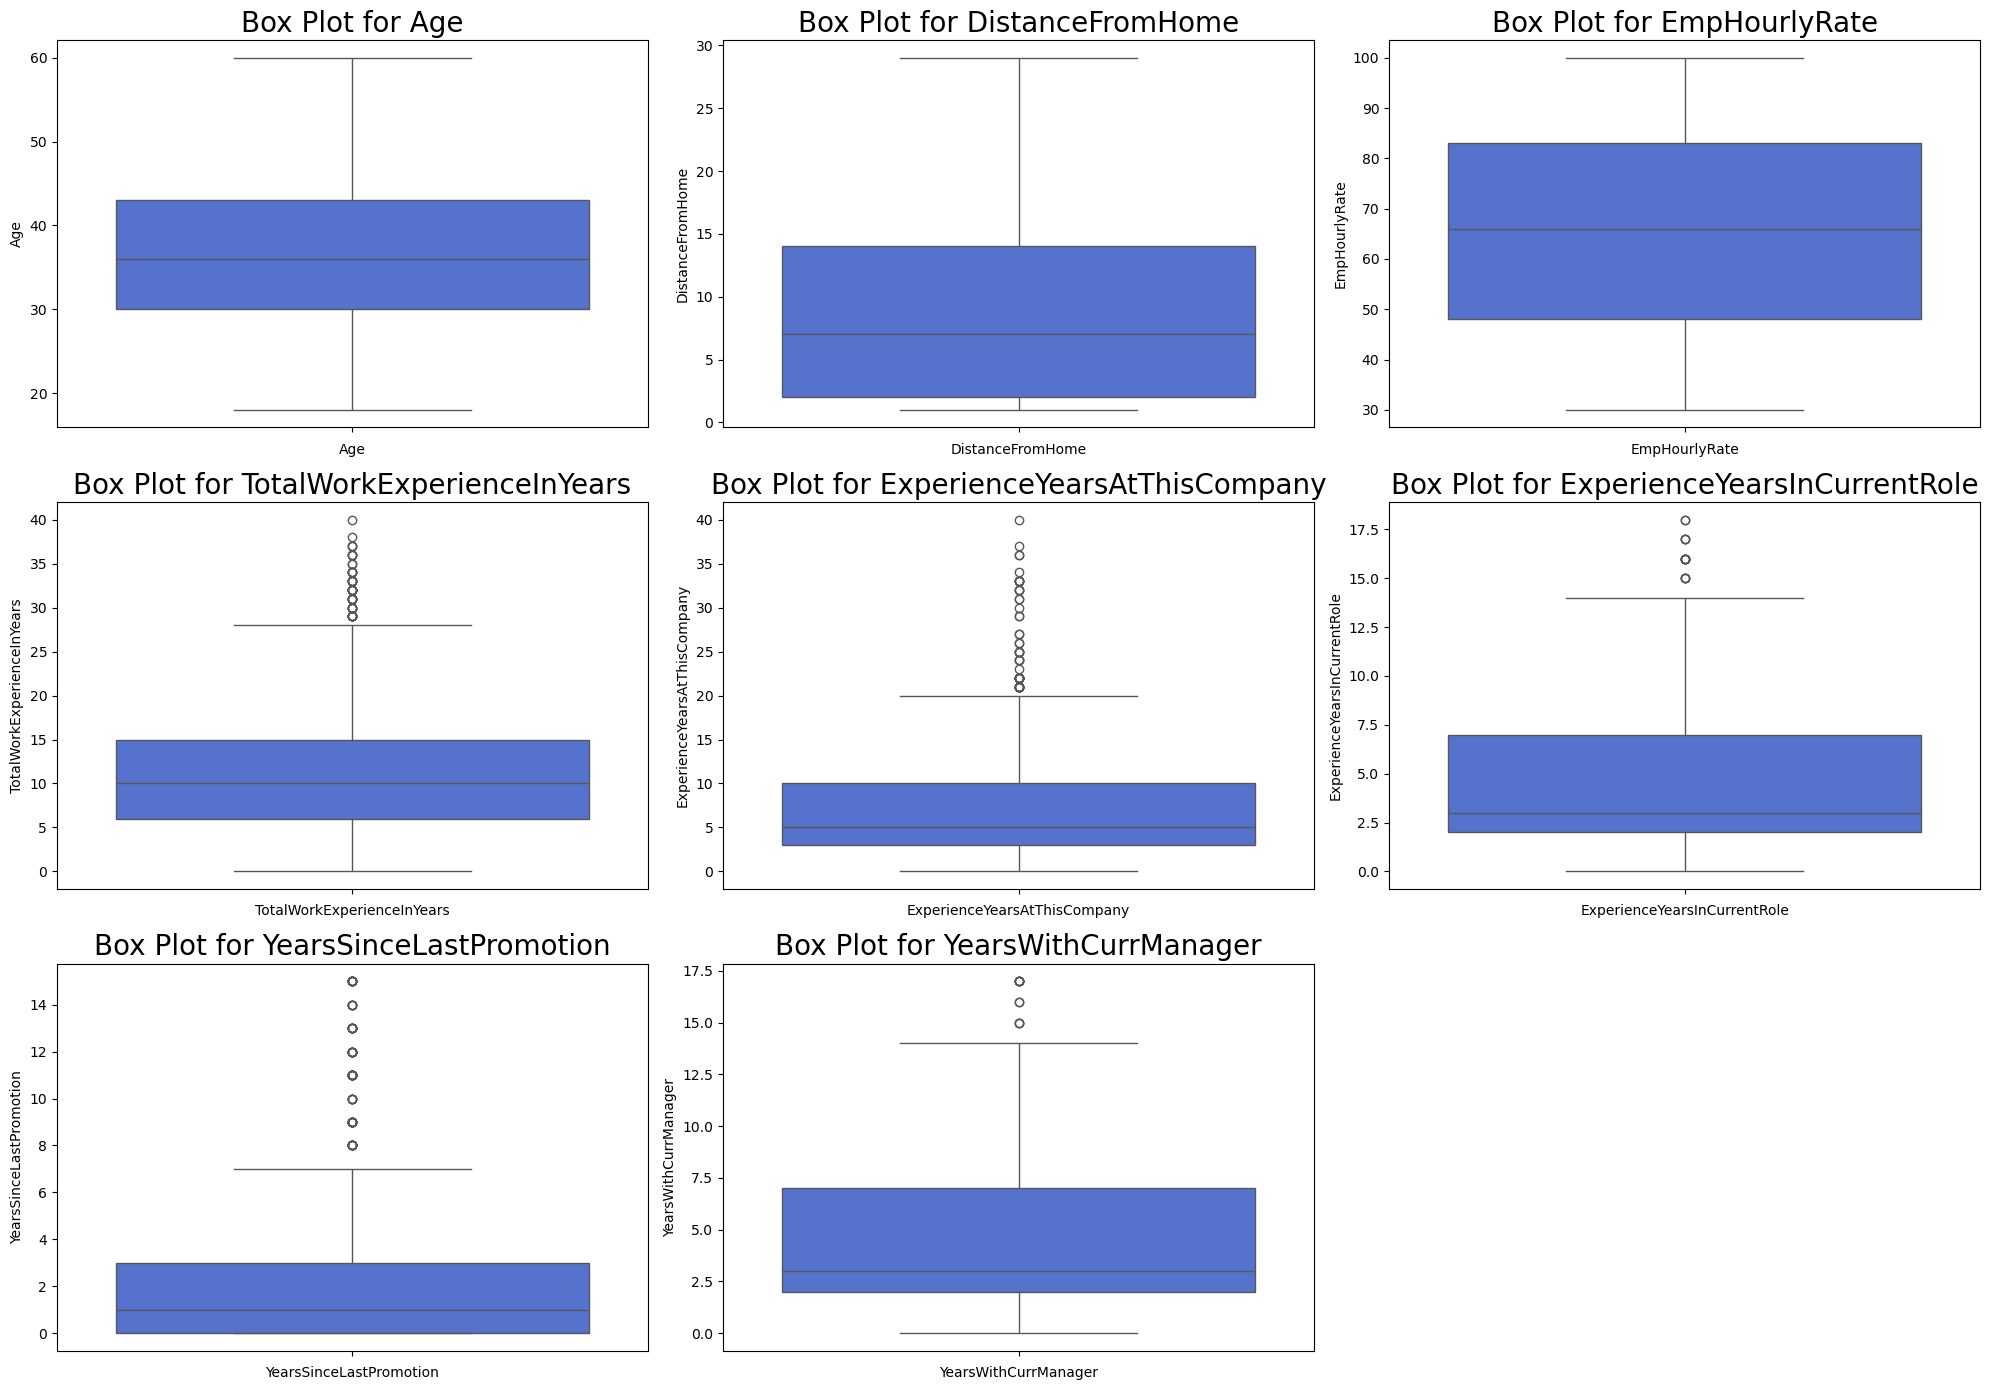

In [14]:
# Outlier Analysis

# Ensure the directory exists
save_dir = 'src/visualization'
os.makedirs(save_dir, exist_ok=True)

# Outlier Analysis
plt.figure(figsize=(20, 14))  # Defining canvas size
plotno = 1  # Counter for subplot placement

for column in numerical_cols:  # Iterating through numerical columns
    if plotno <= 9:  # Limit to 9 subplots (3x3 grid)
        plt.subplot(3, 3, plotno)  # Create a 3x3 grid of subplots
        sns.boxplot(data[column], color="royalblue")  # Plot box plots for outlier detection
        plt.title(f'Box Plot for {column}', fontsize=20)  # Set plot title with font size
        plt.xlabel(column, fontsize=10)  # Label x-axis with font size
    plotno += 1  # Increment subplot counter

plt.tight_layout()  # Adjust subplot parameters to fit into figure area
plt.show()  # Display the plots

* Purpose: Creates box plots to visualize the distribution of each numerical variable and detect potential outliers.
* How It Works: Box plots show the median, quartiles, and possible outliers in the data.

In [15]:
# Addressing outliers
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data[col] < (Q1 - 1.5 * IQR)) |(data[col] > (Q3 + 1.5 * IQR)))]

* Removes outliers from the numerical data using the Interquartile Range (IQR) method.
* How It Works:
    * Calculate the first quartile (Q1) and third quartile (Q3) for each numerical column.
    * Compute the IQR as the difference between Q3 and Q1.
    * Define outliers as data points lying outside 1.5 * IQR from Q1 and Q3.
    * Filter out these outliers from the DataFrame.

In [16]:
# List Categorical variables
categorical_cols = ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'EmpEducationLevel', 
                    'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'OverTime', 'EmpRelationshipSatisfaction',
                    'EmpWorkLifeBalance']

* Purpose: This list includes all categorical columns in the DataFrame.

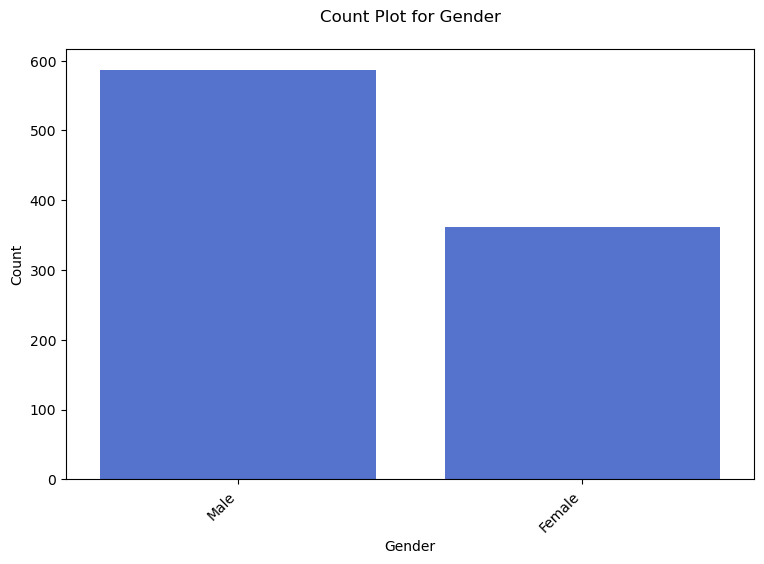

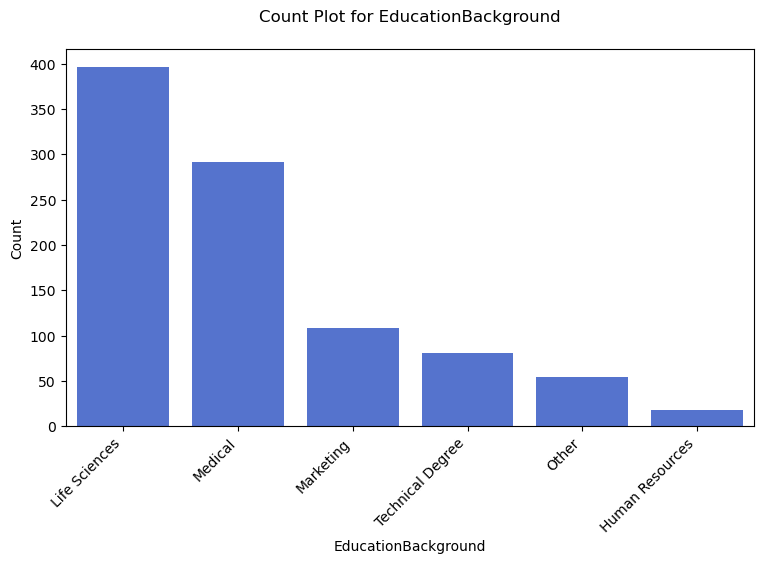

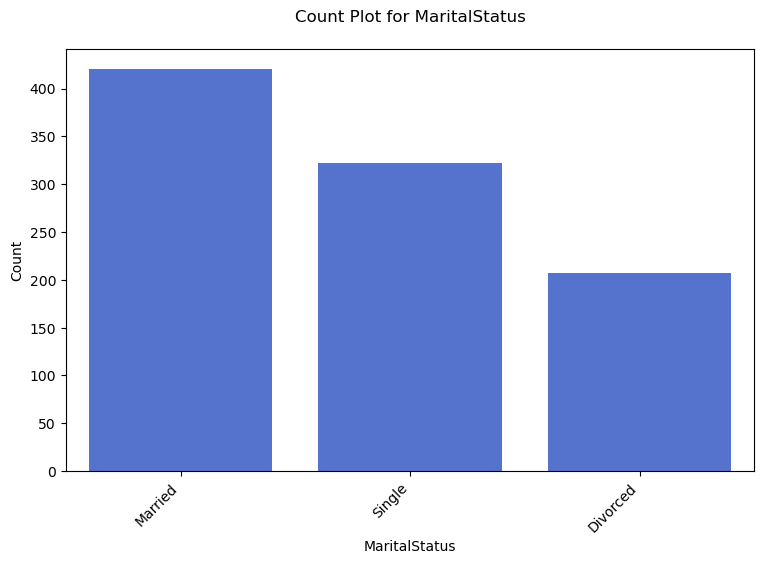

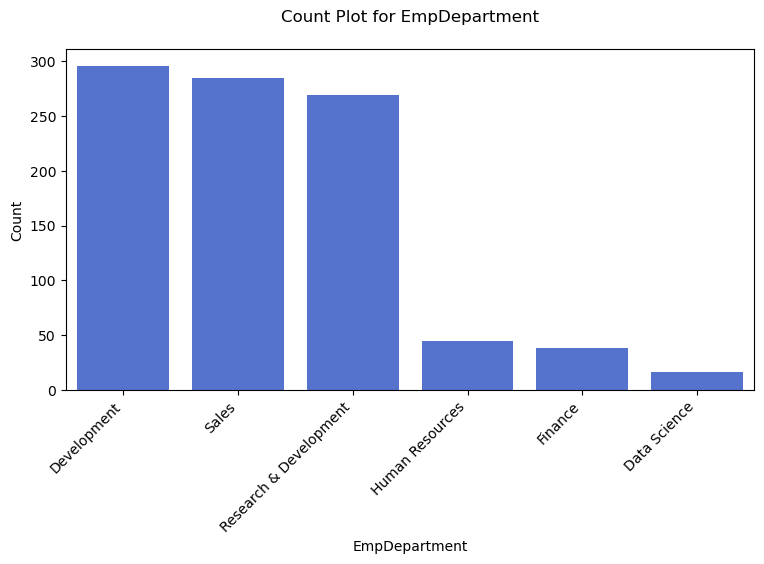

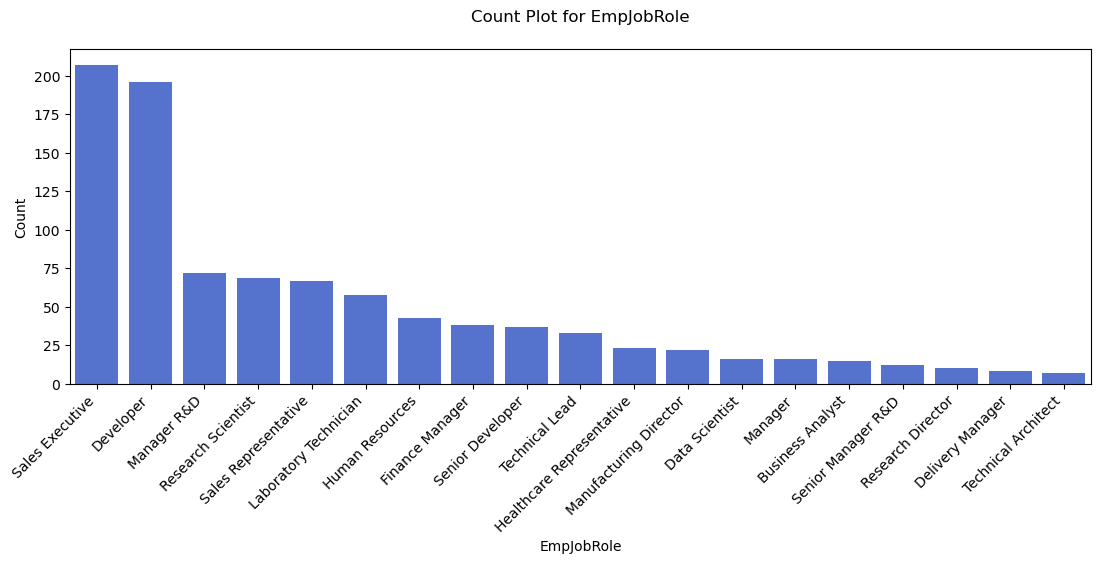

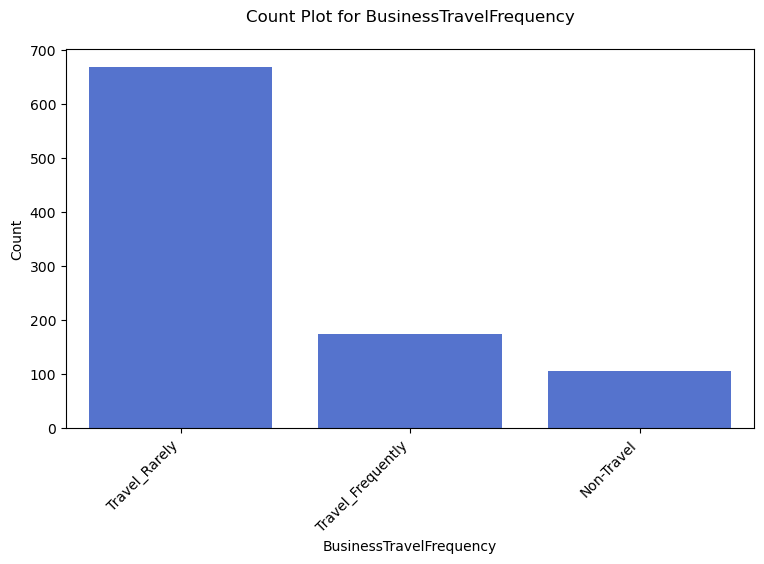

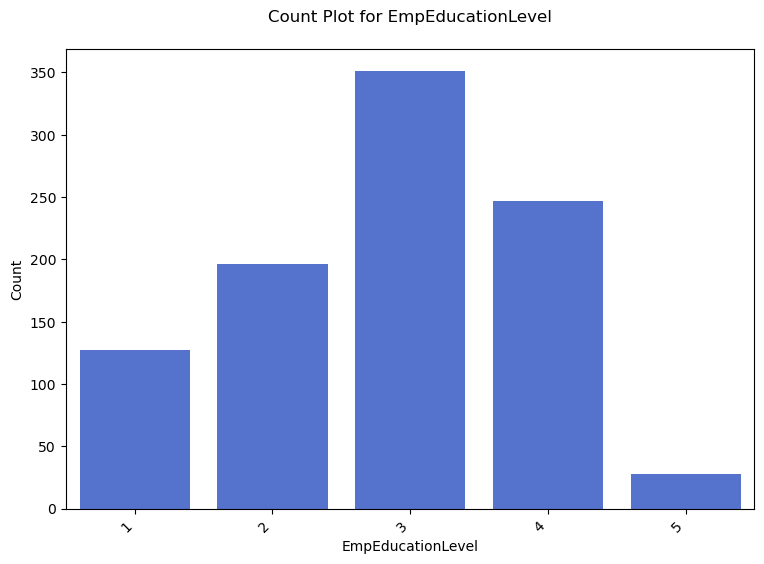

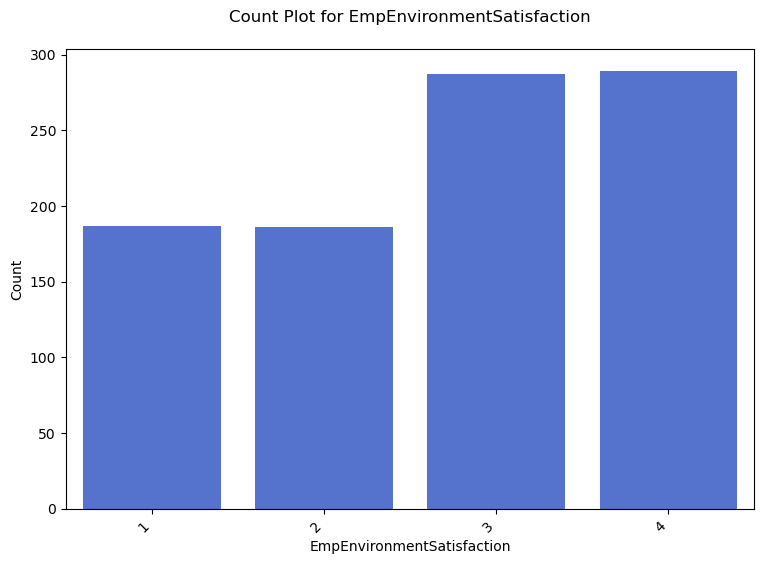

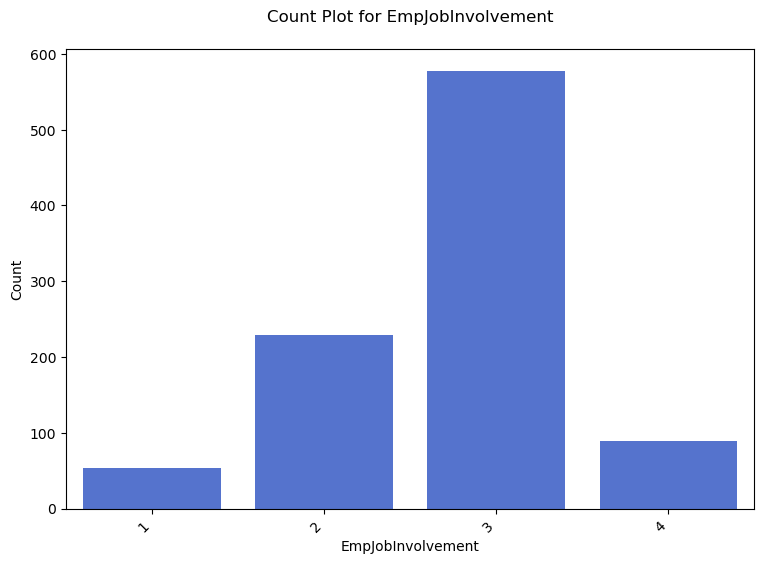

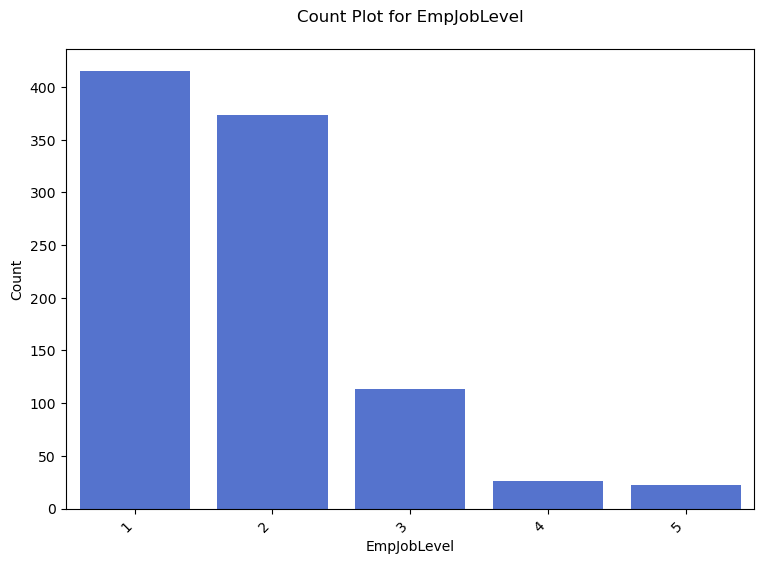

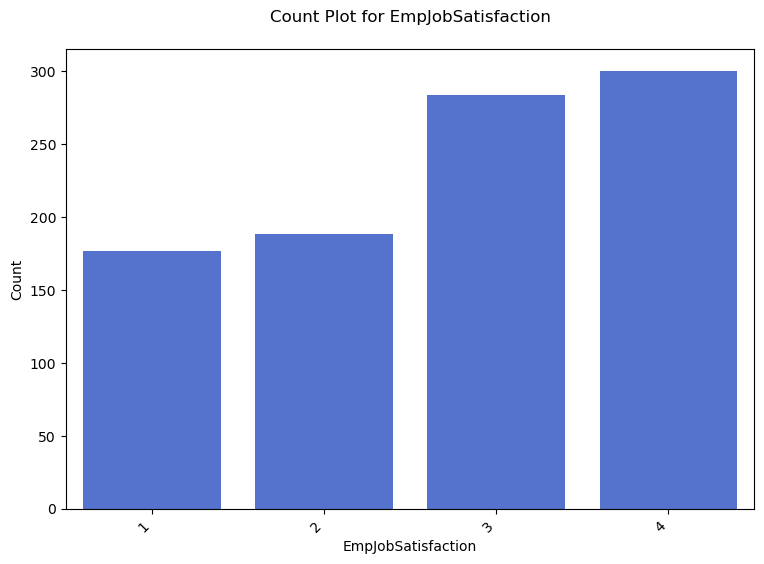

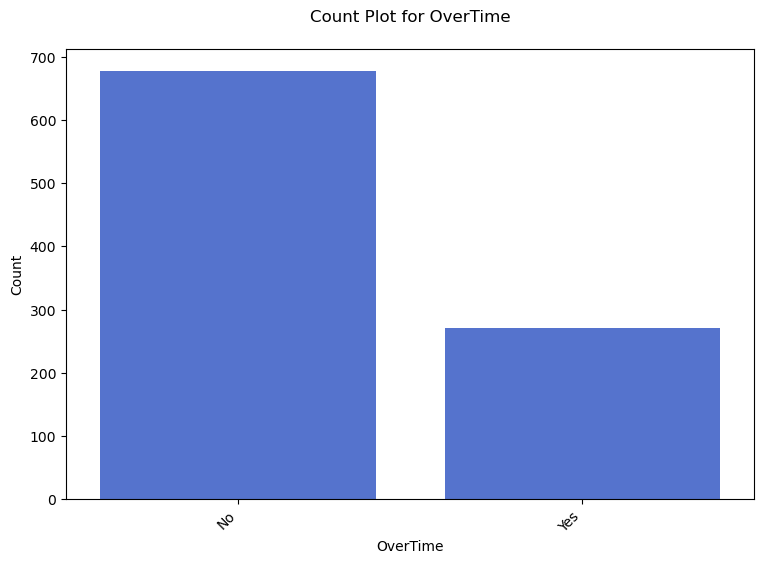

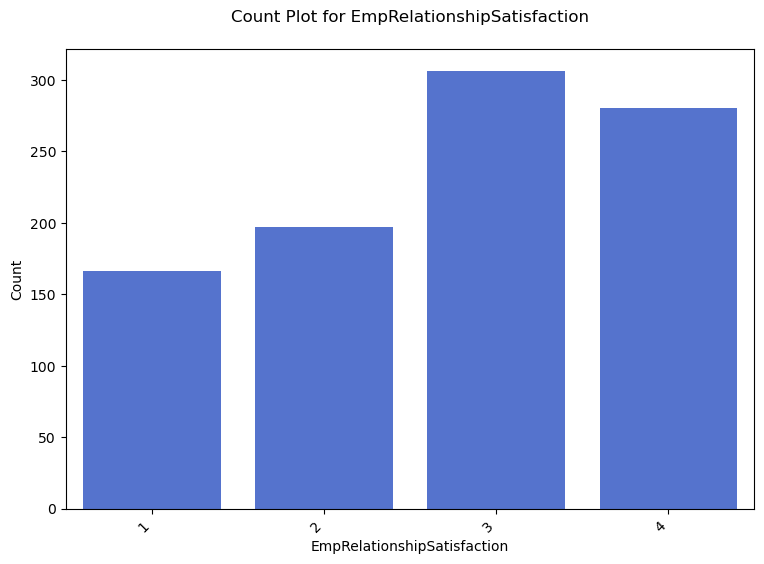

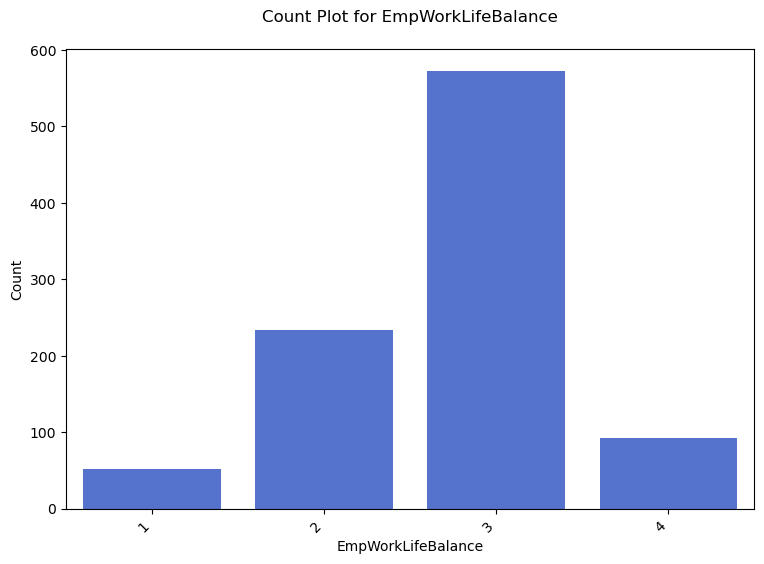

In [17]:
# Frequency Plots for Categorical Variables

# Ensure the directory exists
save_dir = 'src/visualization'
os.makedirs(save_dir, exist_ok=True)

for col in categorical_cols:
    # Get count of each category and sort in descending order
    count_data = data[col].value_counts().sort_values(ascending=False)
    
    # Create a DataFrame from the sorted counts
    sorted_data = pd.DataFrame(count_data).reset_index()
    sorted_data.columns = [col, 'Count']
    
    # Dynamically adjust figure size based on the number of categories
    num_categories = len(sorted_data)
    figsize = (max(8, num_categories * 0.6), 6)  # Adjust width depending on the number of bars
    
    # Set up the plot
    plt.figure(figsize=figsize)
    sns.barplot(x=col, y='Count', data=sorted_data, color="royalblue")
    
    # Rotate x-axis labels and set their alignment
    plt.xticks(rotation=45, ha='right')
    
    # Add title with padding
    plt.title(f'Count Plot for {col}', pad=20)
    
    # Automatically adjust layout to prevent overlap
    plt.tight_layout(pad=2)
    
    # Save the plot with bbox_inches='tight' to adjust to content
    plt.savefig(os.path.join(save_dir, f'{col}_count_plot.png'), bbox_inches='tight')
    
    # Show the plot
    plt.show()

* Purpose: Creates count plots (bar plots) to visualize the frequency distribution of each category in the categorical columns.
* How It Works:
    * `sns.countplot(x=col, data=data)` creates a bar plot for each categorical column.
    * `plt.xticks(rotation=45)` rotates x-axis labels for better readability.

In [18]:
# Save the cleaned data
data.to_csv('data/processed/cleaned_data.csv', index=False)

* Saves the cleaned DataFrame (after outlier removal) to a CSV file for further analysis or modeling.
* How It Works: data.to_csv writes the DataFrame to a CSV file without including the index column.

# 4. Data Processing: Cleaning, Feature Selection and Engineering
* File: `data_processing.ipynb`
    * Here you could address any missing values, encode any categorical variables in the dataset, normalize/scale features, conduct dimensionality reduction with PCA, then save transformed data

In [19]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import joblib

from sklearn.pipeline import Pipeline

# Load the cleaned dataset 
data = pd.read_csv('data/processed/cleaned_data.csv')
print("Columns in data:", data.columns)

Columns in data: Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')


## 4a) Data Cleaning and Transformation:

* Handling Missing Values: data.fillna(data.median(), inplace=True) replaces missing values with the median of each column.
* Encoding Categorical Variables: LabelEncoder converts categorical values into numerical labels.
* Feature Scaling: StandardScaler standardizes numerical features.

In [20]:
# Encoding categorical variables
categorical_cols = ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'EmpEducationLevel', 
                    'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'OverTime', 'EmpRelationshipSatisfaction', 
                    'EmpWorkLifeBalance', 'Attrition']

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [21]:
# # Save the label encoders
# joblib.dump(label_encoders, 'data/processed/label_encoders.pkl')

In [22]:
# Feature Scaling
numerical_cols = [
    'Age', 'DistanceFromHome', 'EmpHourlyRate', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 
    'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EmpEducationLevel', 
    'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'EmpRelationshipSatisfaction', 'EmpWorkLifeBalance',
    'TrainingTimesLastYear', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent'
]

In [23]:
# Handling missing values
# Fill missing values for numeric columns with median
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())


In [24]:
# Feature Scaling
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [25]:
# Check if all categorical columns are present
for col in categorical_cols:
    if col not in data.columns:
        raise KeyError(f"Categorical column '{col}' is missing from the data.")

# Check if all numerical columns are present
for col in numerical_cols:
    if col not in data.columns:
        raise KeyError(f"Numerical column '{col}' is missing from the data.")


In [26]:
# Creating and Saving a Preprocessor
# Create preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler())                 # Standardize features
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))    # Encode categorical features
])

# Combine into a single preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns if any
)

In [27]:
# Prepare data for feature selection and PCA
X = data.drop(['PerformanceRating', 'EmpNumber'], axis=1)
y = data['PerformanceRating']

In [28]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Check for duplicates and unique columns
all_columns = numerical_cols + categorical_cols
unique_columns = list(set(all_columns))
print(f"Unique columns: {unique_columns}")

# Ensure columns are present in X_train
missing_columns = set(unique_columns) - set(X_train.columns)
if missing_columns:
    raise ValueError(f"Missing columns in X_train: {missing_columns}")

# Prepare the features DataFrame
X_train_features = X_train[unique_columns]

# Fit the preprocessor
preprocessor.fit(X_train_features)

# # Save the preprocessor
# import joblib
# joblib.dump(preprocessor, 'data/processed/preprocessor.pkl')


Unique columns: ['EmpWorkLifeBalance', 'EmpLastSalaryHikePercent', 'EmpEnvironmentSatisfaction', 'YearsWithCurrManager', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpDepartment', 'Age', 'TrainingTimesLastYear', 'EmpRelationshipSatisfaction', 'EmpJobLevel', 'EducationBackground', 'BusinessTravelFrequency', 'TotalWorkExperienceInYears', 'EmpJobSatisfaction', 'OverTime', 'Attrition', 'Gender', 'DistanceFromHome', 'MaritalStatus', 'EmpEducationLevel', 'NumCompaniesWorked', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'EmpJobRole']


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'DistanceFromHome', 'EmpHourlyRate',
                                  'TotalWorkExperienceInYears',
                                  'ExperienceYearsAtThisCompany',
                                  'ExperienceYearsInCurrentRole',
                                  'YearsSinceLastPromotion',
                                  'YearsWithCurrManager', 'EmpEducationLevel',
                                  'EmpEnviron...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'EducationBackground',
                                  'MaritalStatus', 'EmpDepartment',
                                  'EmpJobRole', 'BusinessTravelFrequency',
                                  'EmpEducationLevel',
                                  'EmpEnvironmentSatisfaction',
                                  'EmpJobInvolvement', 'EmpJobLevel',
                                  'EmpJobSatisfaction', 'OverTime',
                                  'EmpRelationshipSatisfaction',
                                  'EmpWorkLifeBalance', 'Attrition'])])

## 4b) Feature Selection:

* SelectKBest selects the top features based on the ANOVA F-test, which measures the relationship between each feature and the target variable.

In [30]:
# Feature Selection using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')  # Get scores for all features
X_new = selector.fit_transform(X_train, y_train)
feature_scores = selector.scores_
features = X_train.columns

In [31]:
# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Score': feature_scores
})

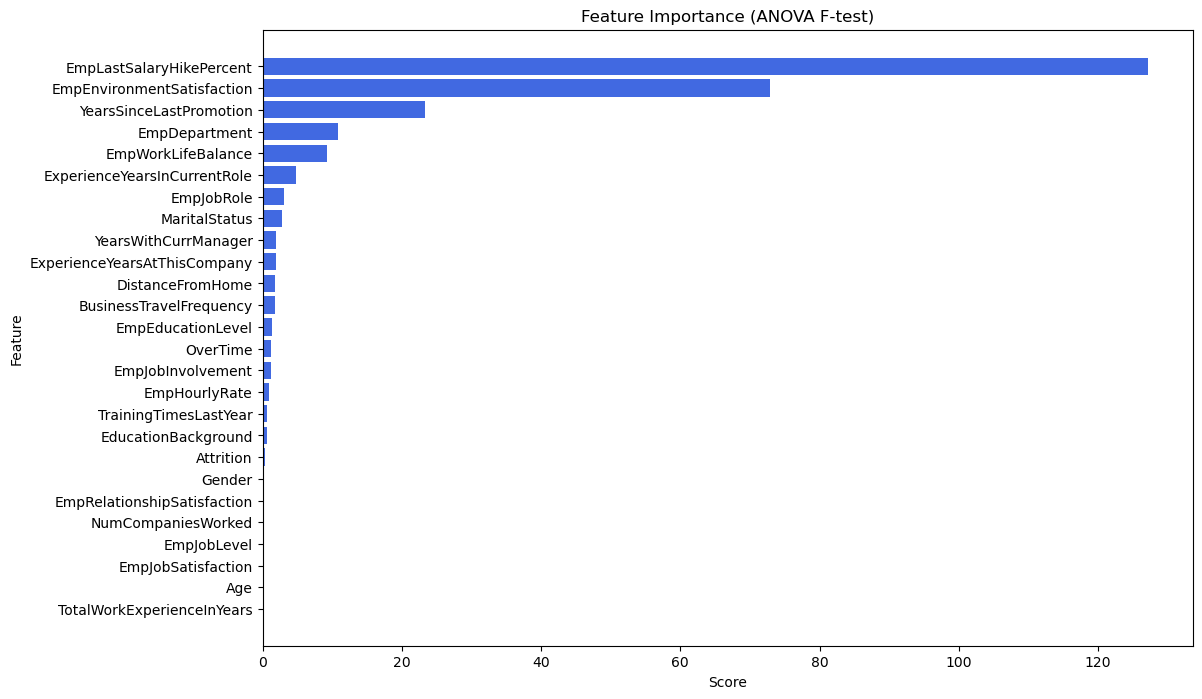

In [32]:
# Ensure the directory exists
save_dir = 'src/visualization'
os.makedirs(save_dir, exist_ok=True)

# Sort the DataFrame by scores in descending order
importance_df = importance_df.sort_values(by='Score', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))  # Define canvas size
plt.barh(importance_df['Feature'], importance_df['Score'], color='royalblue')  # Create a horizontal bar plot
plt.xlabel('Score')  # Label for the x-axis
plt.ylabel('Feature')  # Label for the y-axis
plt.title('Feature Importance (ANOVA F-test)')  # Title of the plot
plt.gca().invert_yaxis()  # Invert y-axis to display highest scores at the top
plt.show()  # Display the plot

In [33]:
# Select top 5 features

# Assuming importance_df is already sorted by 'Score' in descending order
top_features_df = importance_df.head(5)
top_features = top_features_df['Feature'].values  # Extract the feature names

print("Top 5 Selected Features:")
print(top_features_df)


Top 5 Selected Features:
                       Feature       Score
16    EmpLastSalaryHikePercent  127.208294
9   EmpEnvironmentSatisfaction   72.864117
23     YearsSinceLastPromotion   23.304250
4                EmpDepartment   10.802602
20          EmpWorkLifeBalance    9.329755


In [34]:
# Considering X is the original feature set, define the top 5 feature importance
X_top_features = X[top_features]

# Now X_top_features contains only the top 5 important features


## 4c) Rework and Preprocessing Based on Selected Features

In [35]:
# Sort by Score and select top 5 features
importance_df = importance_df.sort_values(by='Score', ascending=False)
top_features_df = importance_df.head(5)
top_features = top_features_df['Feature'].tolist()

# Save the top 5 feature names
joblib.dump(top_features, 'data/processed/trained_feature_names.pkl')
print("Top 5 feature names saved.")

Top 5 feature names saved.


In [36]:
# Encoding categorical variables
categorical_cols = ['EmpDepartment']

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [37]:
# Save the label encoders
joblib.dump(label_encoders, 'data/processed/label_encoders.pkl')

['data/processed/label_encoders.pkl']

In [38]:
# Feature Scaling
numerical_cols = [
     'YearsSinceLastPromotion', 'EmpEnvironmentSatisfaction', 'EmpWorkLifeBalance', 'EmpLastSalaryHikePercent'
]

In [39]:
# Handling missing values
# Fill missing values for numeric columns with median
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())


In [40]:
# Feature Scaling
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [41]:
# Check if all categorical columns are present
for col in categorical_cols:
    if col not in data.columns:
        raise KeyError(f"Categorical column '{col}' is missing from the data.")

# Check if all numerical columns are present
for col in numerical_cols:
    if col not in data.columns:
        raise KeyError(f"Numerical column '{col}' is missing from the data.")


In [42]:
# Create preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler())                 # Standardize features
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))    # Encode categorical features
])

# Combine into a single preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns if any
)

In [43]:
# Prepare data for feature selection and PCA
X = data.drop(['PerformanceRating', 'EmpNumber'], axis=1)
y = data['PerformanceRating']

In [44]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
# Assume these are the lists of numerical and categorical columns
numerical_cols = ['YearsSinceLastPromotion', 'EmpEnvironmentSatisfaction', 'EmpWorkLifeBalance', 'EmpLastSalaryHikePercent']
categorical_cols = ['EmpDepartment']

# Create a ColumnTransformer for the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # one-hot encode the categorical columns
    ]
)

# Create a pipeline to include PCA
pca = PCA(n_components=5)  # Number of components should match the number in the model

# Combine the preprocessor and PCA into a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca)
])

# Fit the pipeline on the training data
pipeline.fit(X_train[numerical_cols + categorical_cols])

# Save the fitted pipeline
joblib.dump(pipeline, 'data/processed/preprocessor.pkl')

# Verify the number of features after transformation
transformed_sample = pipeline.transform(X_train[numerical_cols + categorical_cols])
print(f"Number of features after transformation: {transformed_sample.shape[1]}")


Number of features after transformation: 5


In [46]:
print("Numerical columns in preprocessor:", preprocessor.transformers_[0][2])
print("Categorical columns in preprocessor:", preprocessor.transformers_[1][2])


Numerical columns in preprocessor: ['YearsSinceLastPromotion', 'EmpEnvironmentSatisfaction', 'EmpWorkLifeBalance', 'EmpLastSalaryHikePercent']
Categorical columns in preprocessor: ['EmpDepartment']


In [47]:
# Save feature names
joblib.dump(numerical_cols, 'data/processed/trained_feature_names.pkl')

['data/processed/trained_feature_names.pkl']

## 4c) Dimensionality Reduction:

* PCA reduces the dimensionality of the data to the top 5 principal components.
* This step helps in simplifying the model by reducing the number of features while retaining most of the variance in the data.

Non-numeric columns: Index(['Feature'], dtype='object')


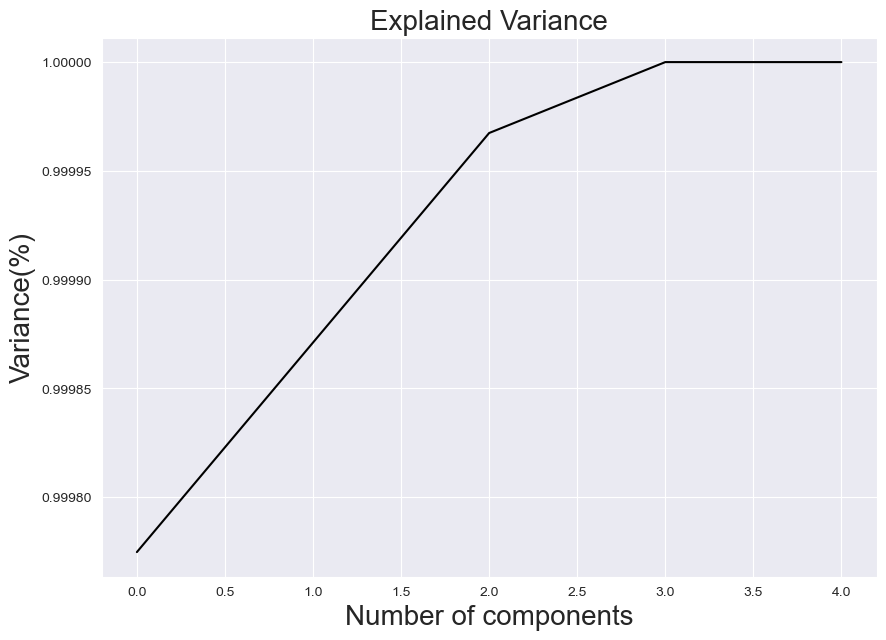

In [48]:
# Getting the optimal value of PCA
from sklearn.decomposition import PCA

# Identify non-numeric columns
non_numeric_columns = top_features_df.select_dtypes(exclude=[np.number]).columns

# Print the non-numeric columns
print("Non-numeric columns:", non_numeric_columns)

# Converting categorical data using one-hot encoding
top_features_df = pd.get_dummies(top_features_df, drop_first=True)


# Object creation
# pca = PCA(n_components=5)
pca = PCA()

principlecomponent = pca.fit_transform(top_features_df)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

In [49]:
# # Getting the optimal value of PCA
# from sklearn.decomposition import PCA

# # Identify non-numeric columns
# non_numeric_columns = transformed_sample.select_dtypes(exclude=[np.number]).columns

# # Print the non-numeric columns
# print("Non-numeric columns:", non_numeric_columns)

# # Converting categorical data using one-hot encoding
# transformed_sample = pd.get_dummies(data, drop_first=True)


# # Object creation
# # pca = PCA(n_components=5)
# pca = PCA()

# principlecomponent = pca.fit_transform(transformed_sample)
# plt.figure(figsize=(10,7))
# sns.set_style('darkgrid')
# plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
# plt.xlabel('Number of components',fontsize=20)
# plt.ylabel('Variance(%)',fontsize=20) # for each componant
# plt.title('Explained Variance',fontsize=20)
# plt.show()

In [50]:
# Transform the training data
X_train_transformed = preprocessor.transform(X_train_features)

In [51]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=5)
# X_pca = pca.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_transformed)

In [52]:
# Save the PCA model
joblib.dump(pca, 'data/processed/pca_model.pkl')

['data/processed/pca_model.pkl']

## 4d) Save Transformed Data:

* The cleaned, scaled, selected, and reduced data is saved to a CSV file for future use or model training.

In [53]:
# Ensure columns are present
missing_numerical_cols = set(numerical_cols) - set(X_train.columns)
if missing_numerical_cols:
    raise ValueError(f"Missing columns in X_train: {missing_numerical_cols}")


In [54]:
### Define preprocessing objects
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

In [55]:
# # Save cleaned and transformed data
# transformed_data = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
# transformed_data['Target'] = y_train.values  # Adding target variable for completeness
# transformed_data.to_csv('data/processed/transformed_data.csv', index=False)

# Save the transformed data
transformed_data = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
transformed_data['Target'] = y_train.values  # Add the target variable for completeness
transformed_data.to_csv('data/processed/transformed_data.csv', index=False)

In [56]:
# Fit preprocessing objects on the training data
imputer.fit(X_train[numerical_cols])
scaler.fit(X_train[numerical_cols])

StandardScaler()

In [57]:
# Save the trained columns (i.e., column names from X_train)
joblib.dump(X_train.columns.tolist(), 'data/processed/trained_columns.pkl')

['data/processed/trained_columns.pkl']

# 5. Build, Train and Evaluate the Model(s)
* File: `train_model.ipynb`
    * Use a combination of traditional machine learning models and a deep learning model (MLP) to predict employee performance.
    * The MLP is especially capable of learning complex patterns and relationships in the data, providing a robust prediction.

## 5a) Libraries and Loading the Data

In [58]:
# Import Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
import matplotlib.pyplot as plt
import joblib



# Load cleaned and transformed data
df = pd.read_csv('data/processed/transformed_data.csv')

* Import Statements
    * `from sklearn.linear_model import LogisticRegression`: Imports the LogisticRegression class for logistic regression modeling.
    * `from sklearn.tree import DecisionTreeClassifier`: Imports the DecisionTreeClassifier class for decision tree classification.
    * `from sklearn.ensemble import RandomForestClassifier`: Imports the RandomForestClassifier class for random forest classification.
    * `from sklearn.svm import SVC`: Imports the SVC class for Support Vector Classification (SVM).
    from sklearn.neural_network import MLPClassifier`: Imports the MLPClassifier class for Multi-layer Perceptron (MLP) classification.
    * `from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report`: Imports various metrics for evaluating model performance.
    * `from sklearn.model_selection import train_test_split`: Imports train_test_split for splitting the dataset into training and testing sets.
    * `from sklearn.feature_selection import SelectKBest, f_classif`: Imports feature selection tools to select the most relevant features.
    * `import pandas as pd`: Imports pandas for data manipulation.

## 5b) Data Preparation
* Load and Preprocess Data: The comment indicates that data loading and preprocessing should be done before this point. 
* The data variable should be a pandas DataFrame containing your dataset.

In [59]:
# Separate features and target
X = df.drop(['Target'], axis=1)
y = df['Target']

* X: Contains all features except the target variable PerformanceRating.
* y: Contains only the target variable PerformanceRating.

In [60]:
# X and y is a pandas dataframe. Before fitting make it a numpy array
X = X.values
y = y.values


In [61]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

* Splits the dataset into training and testing sets.
    * test_size=0.3: 30% of the data is used for testing.
    * random_state=42: Ensures reproducibility of the split.

## 5c) Model Building

In [62]:
# Defining the Ordinal Logistic Regression Classes and Weights
class OrdinalLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.models = []

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        for i in range(len(self.classes_) - 1):
            binary_y = (y > self.classes_[i]).astype(int)
            model = sm.Logit(binary_y, sm.add_constant(X)).fit(disp=0)
            self.models.append(model)
        return self

    def predict(self, X):
        preds = np.zeros(X.shape[0])
        for i, model in enumerate(self.models):
            prob = model.predict(sm.add_constant(X))
            preds += (prob > 0.5).astype(int)
        return self.classes_[preds.astype(int)]

# Custom class weights
class_weights = {2: 1.0, 3: 2.0, 4: 3.0}

In [63]:
# Initialize models with improvements
models = {
    "Ordinal Logistic Regression": OrdinalLogisticRegression(),
    "Logistic Regression": LogisticRegression(multi_class='ovr', max_iter=1000, class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(class_weight=class_weights),
    "Random Forest": RandomForestClassifier(class_weight=class_weights, n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(kernel='rbf', C=1.0, class_weight='balanced', probability=True),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, early_stopping=True)
}

* Logistic Regression: Configured for multiclass classification using the one-vs-rest (OvR) approach (multi_class='ovr').
* Decision Tree: A basic decision tree classifier.
* Random Forest: A random forest classifier with 100 trees.
* SVM: Support Vector Classifier.
* MLP: Multi-layer Perceptron with one hidden layer of 100 neurons.

In [64]:
# Apply feature scaling for models sensitive to feature scaling (SVM, KNN, MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5d) Model Training and Evaluation

In [65]:

# Define a function to evaluate models
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    try:
        # Train the model
        if name in ["SVM", "KNN", "MLP"]:
            model.fit(X_train_scaled, y_train)  # Use scaled data for SVM, KNN, and MLP
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Collect metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # Print evaluation metrics
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("Classification Report:")
        print(classification_report(y_test, y_pred, zero_division=0))
        print("-" * 50)

        # Store metrics
        metrics["Model"].append(name)
        metrics["Accuracy"].append(accuracy)
        metrics["Precision"].append(precision)
        metrics["Recall"].append(recall)
        metrics["F1 Score"].append(f1)
        
    except Exception as e:
        print(f"Error with model {name}: {e}")
        metrics["Model"].append(name)
        metrics["Accuracy"].append(np.nan)
        metrics["Precision"].append(np.nan)
        metrics["Recall"].append(np.nan)
        metrics["F1 Score"].append(np.nan)

In [66]:
# Initialize metrics dictionary
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

In [67]:
# Training, prediction, and evaluation loop
for name, model in models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

Model: Ordinal Logistic Regression
Accuracy: 0.8650
Precision: 0.8576
Recall: 0.8650
F1 Score: 0.8569
Confusion Matrix:
[[ 10  13   0]
 [  3 145   6]
 [  1   4  18]]
Classification Report:
              precision    recall  f1-score   support

           2       0.71      0.43      0.54        23
           3       0.90      0.94      0.92       154
           4       0.75      0.78      0.77        23

    accuracy                           0.86       200
   macro avg       0.79      0.72      0.74       200
weighted avg       0.86      0.86      0.86       200

--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.7400
Precision: 0.8249
Recall: 0.7400
F1 Score: 0.7609
Confusion Matrix:
[[ 18   5   0]
 [ 16 111  27]
 [  1   3  19]]
Classification Report:
              precision    recall  f1-score   support

           2       0.51      0.78      0.62        23
           3       0.93      0.72      0.81       154
           4       0.41      0.83  

1)  Iterating Through Models
```python
for name, model in models.items():
```
    * This loop iterates over each item in the models dictionary.
    * name is the key (typically a string that names the model).
    * model is the value (the model object itself).
2) Try-Except Block
```python
try:
    ...
except Exception as e:
    print(f"Error with model {name}: {e}")
```
    * The try block contains the code that might raise an exception, such as errors in model training or prediction.
    * The except block catches any exceptions and prints an error message that includes the name of the model and the exception message.

3) Training the Model
```python
model.fit(X_train, y_train)
```
    * The fit method trains the model using the training dataset (X_train and y_train).

4) Making Predictions
```python
y_pred = model.predict(X_test)
```
    * The predict method is used to make predictions on the test dataset (X_test).
    * The predicted labels are stored in y_pred.

5) Printing Model Name
```python
print(f"Model: {name}")
```
    * Prints the name of the model being evaluated.

6) Calculating and Printing Evaluation Metrics
```python
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
```
    * Accuracy: Measures the ratio of correctly predicted observations to the total observations.
    * Precision: Measures the ratio of correctly predicted positive observations to the total predicted positive observations. The average='weighted' 
    * parameter accounts for label imbalance by computing a weighted average of precision scores across different labels. The zero_division=0 parameter avoids division by zero errors.
    * Recall: Measures the ratio of correctly predicted positive observations to all actual positives.
    * F1 Score: Harmonic mean of precision and recall, providing a balance between the two metrics.

6) Confusion Matrix
```python
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
```
    * The confusion matrix shows the number of correct and incorrect predictions made by the model categorized by actual and predicted classes.
7) Classification Report
```python
print("Classification Report:")
print(classification_report(y_test, y_pred))
```
    * The classification report provides a detailed breakdown of precision, recall, F1-score, and support for each class in the dataset.
8) Separator for Readability
```python
print("-" * 50)
```

## 5e) Visualization of Model Performance

* `matplotlib.pyplot`: A library used for creating static, interactive, and animated visualizations in Python. 
    * It provides a wide array of functions to plot data.
* `seaborn`: A data visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics

In [68]:
# # Initialize dictionaries to store metrics
# metrics = {
#     "Model": [],
#     "Accuracy": [],
#     "Precision": [],
#     "Recall": [],
#     "F1 Score": []
# }

* A dictionary named _metrics_ is initialized with empty lists for each key.
    * Each key represents a performance metric (`Model`, `Accuracy`, `Precision`, `Recall`, `F1 Score`).

* Loop through Models: The loop iterates over a dictionary called models, where each key-value pair represents a `model name` and `its corresponding model object`.
* Training: model.fit(X_train, y_train) trains the model using the training data X_train and y_train.
* Prediction: model.predict(X_test) generates predictions for the test data X_test.
* Metrics Calculation:
    * `Accuracy`: Proportion of correctly predicted instances over all instances.
    * `Precision`: Proportion of true positives. Calculated with average = 'weighted' to account for class imbalance and zero_division = 0 to handle any divisions by zero by setting the result to zero.
    * `Recall`: Proportion of actual positives correctly identified.
    * `F1 Score`: Harmonic mean of precision and recall.
* Error Handling: If an error occurs during training or prediction, the exception is caught and printed.

In [69]:
# Convert metrics dictionary to DataFrame for visualization
metrics_df = pd.DataFrame(metrics)

* The collected metrics are converted into a pandas DataFrame named `metrics_df`.
* This DataFrame is used for easier manipulation and visualization of the data.

In [70]:
# Handle missing values by replacing NaNs with zeroes for visualization
metrics_df.fillna(0, inplace=True)

In [71]:
# Define a color palette based on the unique model names
unique_models = metrics_df['Model'].unique()
palette = sns.color_palette('viridis', len(unique_models))  # Use 'viridis' color palette
color_map = dict(zip(unique_models, palette))

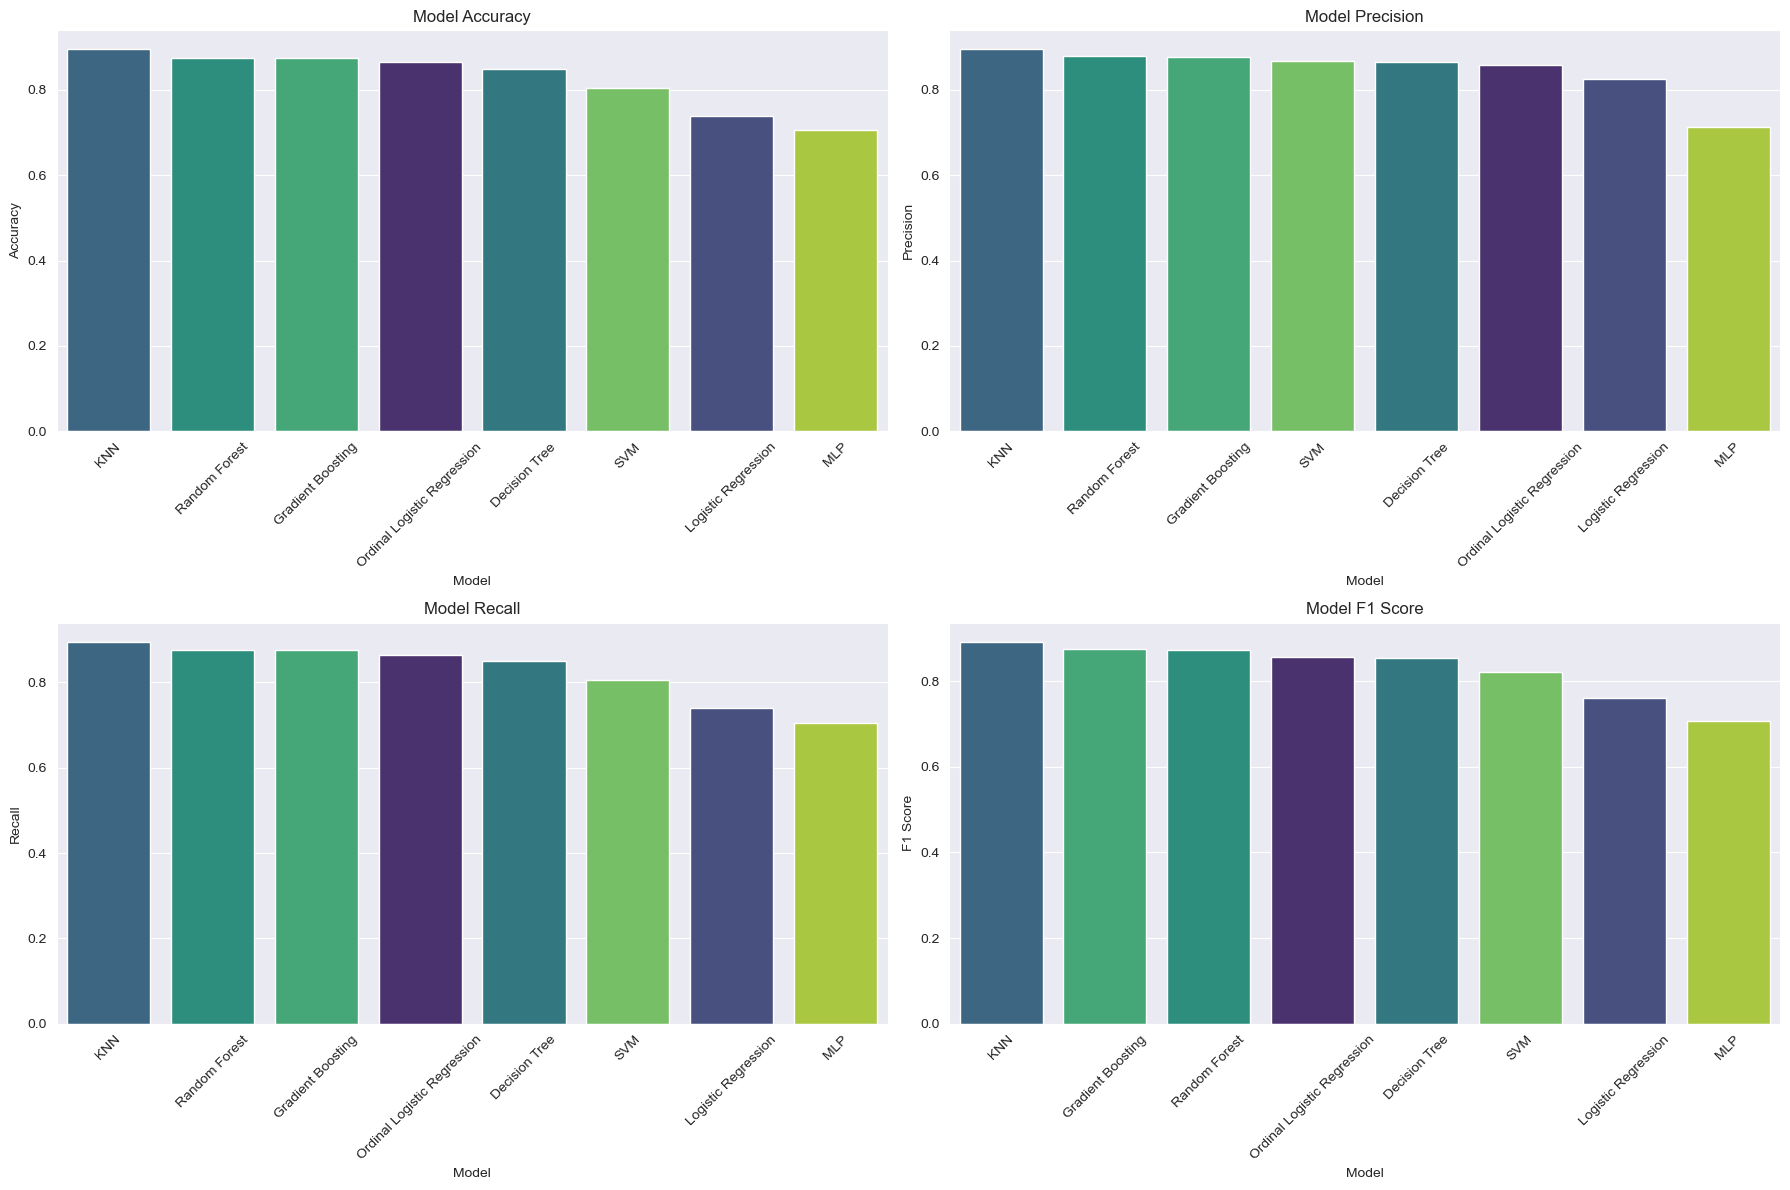

In [72]:
# Plot performance metrics
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Define metrics
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for i, metric in enumerate(metrics_list):
    ax = axes[i // 2, i % 2]
    sorted_df = metrics_df.sort_values(by=metric, ascending=False)
    
    sns.barplot(x='Model', y=metric, data=sorted_df, ax=ax, palette=color_map, hue='Model', dodge=False)
    ax.set_title(f'Model {metric}')
    
    # Rotate x-axis labels
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

* Subplots: A figure with four subplots (arranged in a 1x4 grid) is created using plt.subplots(). The size of the figure is set to 20 inches by 5 inches.
* Bar Plots:
    * For each metric (Accuracy, Precision, Recall, F1 Score), a bar plot is created using sns.barplot().
    * Each bar plot uses the metrics_df DataFrame, plotting the metric value on the x-axis and the model name on the y-axis.
    * Each subplot is assigned to a specific axis (axes[i]), and a title is set for each subplot.
    * Layout Adjustment: plt.tight_layout() is called to automatically adjust subplot parameters for better spacing.
* Display: plt.show() displays the figure with all the subplots.

# 6. Identify and Save the Best Model
* File: `train_model.ipynb`
    * Based on the above evaluations, choose the model with the highest F1 Score or best overall performance based on other metrics.

In [73]:
# Import library
import joblib
import pandas as pd

* `joblib` is a Python library used for efficient serialization and deserialization of Python objects.
* It is particularly useful for saving machine learning models because it handles large datasets and complex objects more efficiently than the standard pickle module.

In [74]:
# Find the best model based on accuracy
best_model_name = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]
print(f"The best model based on accuracy is: {best_model_name} with an accuracy of {metrics_df['Accuracy'].max():.4f}")


The best model based on accuracy is: KNN with an accuracy of 0.8950


* `metrics_df['Accuracy'].idxmax()`: This function finds the index of the maximum value in the 'Accuracy' column of the metrics_df DataFrame.
    * This index corresponds to the model with the highest accuracy.
* `metrics_df.loc[...]`: This retrieves the model name from the 'Model' column at the index where the accuracy is highest.
* `models[best_model_name]`: This line retrieves the actual model object from the models dictionary using the name of the best model as the key

In [75]:
# # Print the best model name and accuracy
# print(f"The best model is: {best_model_name} with an accuracy of {metrics_df['Accuracy'].max():.4f}")

* This line prints a formatted string that includes the name of the best model and its accuracy, formatted to four decimal places. 
* It provides a quick summary of which model performed the best and how well it performed.

In [76]:
# Save the best model to a file
joblib.dump(best_model, 'data/processed/best_model.pkl')
print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'


* `joblib.dump()`: This function saves the model to a file. It takes two arguments:
    * The first argument is the object to be saved, which in this case is the best performing model (best_model).
    * The second argument is the filename for the saved model ('best_model.pkl'). The file will be saved in the current working directory unless a different path is specified.
* Saving the model allows you to load and use it later without having to retrain it, which can save time and computational resources.


# 7. Use the Model for Prediction
* Steps to Use the Model for Prediction
    1) `Load the Model`: Load your trained model from the specified path using an appropriate library like joblib.
    2) `Prepare Your Data`: Make sure your dataset includes only the selected features. This involves selecting relevant columns and ensuring that the data is clean and preprocessed as needed.
    3) `Preprocess the Data`: Perform any necessary preprocessing steps, such as encoding categorical variables and scaling numerical variables.
    4) `Make Predictions`: Use the loaded model to make predictions based on the preprocessed data.
    5) `Output the Results`: Analyze or save the predictions for further use.

In [77]:
import pandas as pd
import joblib

# Load the trained KNN model (replace with the actual KNN model pkl file)
model = joblib.load('data/processed/best_model.pkl')

# Load the preprocessor
preprocessor = joblib.load('data/processed/preprocessor.pkl')

# Define the top features used during training
top_features = [
    'YearsSinceLastPromotion', 
    'EmpEnvironmentSatisfaction',
    'EmpWorkLifeBalance', 
    'EmpLastSalaryHikePercent',
    'EmpDepartment'
]

# Define the example user data
user_data = {
    'YearsSinceLastPromotion': [0],  # Example data for numerical features
    'EmpEnvironmentSatisfaction': [0.0],
    'EmpWorkLifeBalance': [0.0],
    'EmpLastSalaryHikePercent': [0],
    'EmpDepartment': [0],  # Example data for categorical features
}

# Convert user data to DataFrame with specified column names
user_df = pd.DataFrame(user_data, columns=top_features)

# Transform user data using the preprocessor
user_data_transformed = preprocessor.transform(user_df)

# Make predictions using the KNN model
predictions = model.predict(user_data_transformed)
probabilities = model.predict_proba(user_data_transformed) if hasattr(model, 'predict_proba') else None

# Extract predicted class and its probability
predicted_class = predictions[0]
predicted_class_index = model.classes_.tolist().index(predicted_class)
predicted_class_probability = probabilities[0][predicted_class_index] * 100 if probabilities is not None else None

# Display results in the specified format
print(f"Your Predicted Performance Rating is {predicted_class} at an estimated Probability of {predicted_class_probability:.2f}%.")


Your Predicted Performance Rating is 3 at an estimated Probability of 100.00%.
